<a href="https://colab.research.google.com/github/ozakiryota/kaggle/blob/main/store_sales/store_sales_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downlad and check datasets

Activate Kaggle API

In [1]:
from google.colab import files
import os

jason_path = "/root/.kaggle/kaggle.json"

if not os.path.exists(jason_path):
    uploaded = files.upload()

    for fn in uploaded.keys():
        print("User uploaded file '{name}' with length {length} bytes".format(
            name=fn, length=len(uploaded[fn])))

    # Then move kaggle.json into the folder where the API expects to find it.
    !mkdir -p /root/.kaggle/ && mv kaggle.json /root/.kaggle/ && chmod 600 /root/.kaggle/kaggle.json

else:
    print(jason_path, "is already exists.")

Saving kaggle.json to kaggle.json
User uploaded file 'kaggle.json' with length 66 bytes


Download the datasets

In [2]:
!pip install kaggle
!kaggle competitions download -c store-sales-time-series-forecasting
!unzip -n train.csv.zip
!unzip -n transactions.csv.zip

  0% 0.00/20.1k [00:00<?, ?B/s]
100% 20.1k/20.1k [00:00<00:00, 7.04MB/s]
  0% 0.00/998k [00:00<?, ?B/s]
100% 998k/998k [00:00<00:00, 64.8MB/s]
 43% 9.00M/20.8M [00:00<00:00, 32.5MB/s]
100% 20.8M/20.8M [00:00<00:00, 59.6MB/s]
  0% 0.00/1.35k [00:00<?, ?B/s]
100% 1.35k/1.35k [00:00<00:00, 1.39MB/s]
  0% 0.00/334k [00:00<?, ?B/s]
100% 334k/334k [00:00<00:00, 98.4MB/s]
  0% 0.00/21.8k [00:00<?, ?B/s]
100% 21.8k/21.8k [00:00<00:00, 21.9MB/s]
  0% 0.00/360k [00:00<?, ?B/s]
100% 360k/360k [00:00<00:00, 108MB/s]
Archive:  train.csv.zip
  inflating: train.csv               
Archive:  transactions.csv.zip
  inflating: transactions.csv        


Check the datasets

In [3]:
import pandas as pd

df = pd.read_csv("/content/train.csv")
# df = pd.read_csv("/content/test.csv")
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB
None


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [4]:
df["date"] = pd.to_datetime(df["date"])
df.drop("id", axis=1).set_index(["date", "store_nbr", "family"]).sort_index().unstack(["store_nbr", "family"])

sales            ...                onpromotion        
store_nbr          1             ...                         54        
family     AUTOMOTIVE BABY CARE  ... SCHOOL AND OFFICE SUPPLIES SEAFOOD
date                             ...                                   
2013-01-01        0.0       0.0  ...                          0       0
2013-01-02        2.0       0.0  ...                          0       0
2013-01-03        3.0       0.0  ...                          0       0
2013-01-04        3.0       0.0  ...                          0       0
2013-01-05        5.0       0.0  ...                          0       0
...               ...       ...  ...                        ...     ...
2017-08-11        1.0       0.0  ...                          0       0
2017-08-12        6.0       0.0  ...                          0       1
2017-08-13        1.0       0.0  ...                          0       0
2017-08-14        1.0       0.0  ...                          0       0
2017-08-15        4.0       0.0  ...                          0       0

[1684 rows x 3564 columns]

# Fuctions and class

In [5]:
import pandas as pd

def makeDataList(csv_path):
    datalist = pd.read_csv(csv_path)
    datalist["date"] = pd.to_datetime(datalist["date"])
    datalist = datalist.drop(["id", "onpromotion"], axis=1).set_index(["date", "store_nbr", "family"]).sort_index().unstack(["store_nbr", "family"])

    return datalist

In [6]:
## TEST
datalist = makeDataList("/content/train.csv")
print("datalist.columns =", datalist.columns)
print("datalist.values[0] =", datalist.values[0])
datalist

datalist.columns = MultiIndex([('sales',  1,                 'AUTOMOTIVE'),
            ('sales',  1,                  'BABY CARE'),
            ('sales',  1,                     'BEAUTY'),
            ('sales',  1,                  'BEVERAGES'),
            ('sales',  1,                      'BOOKS'),
            ('sales',  1,               'BREAD/BAKERY'),
            ('sales',  1,                'CELEBRATION'),
            ('sales',  1,                   'CLEANING'),
            ('sales',  1,                      'DAIRY'),
            ('sales',  1,                       'DELI'),
            ...
            ('sales', 54,                  'MAGAZINES'),
            ('sales', 54,                      'MEATS'),
            ('sales', 54,              'PERSONAL CARE'),
            ('sales', 54,               'PET SUPPLIES'),
            ('sales', 54,    'PLAYERS AND ELECTRONICS'),
            ('sales', 54,                    'POULTRY'),
            ('sales', 54,             'PREPARED FOODS

sales            ...                                   
store_nbr          1             ...                         54        
family     AUTOMOTIVE BABY CARE  ... SCHOOL AND OFFICE SUPPLIES SEAFOOD
date                             ...                                   
2013-01-01        0.0       0.0  ...                        0.0     0.0
2013-01-02        2.0       0.0  ...                        0.0     3.0
2013-01-03        3.0       0.0  ...                        0.0     2.0
2013-01-04        3.0       0.0  ...                        0.0     2.0
2013-01-05        5.0       0.0  ...                        0.0     1.0
...               ...       ...  ...                        ...     ...
2017-08-11        1.0       0.0  ...                        0.0     0.0
2017-08-12        6.0       0.0  ...                        0.0     1.0
2017-08-13        1.0       0.0  ...                        0.0     2.0
2017-08-14        1.0       0.0  ...                        0.0     0.0
2017-08-15        4.0       0.0  ...                        0.0     3.0

[1684 rows x 1782 columns]

In [7]:
## TEST
from sklearn.model_selection import train_test_split

train_datalist, val_datalist = train_test_split(datalist, test_size=0.1, random_state=1234, shuffle=False)
print(train_datalist)
print(val_datalist)

                sales            ...                                   
store_nbr          1             ...                         54        
family     AUTOMOTIVE BABY CARE  ... SCHOOL AND OFFICE SUPPLIES SEAFOOD
date                             ...                                   
2013-01-01        0.0       0.0  ...                        0.0     0.0
2013-01-02        2.0       0.0  ...                        0.0     3.0
2013-01-03        3.0       0.0  ...                        0.0     2.0
2013-01-04        3.0       0.0  ...                        0.0     2.0
2013-01-05        5.0       0.0  ...                        0.0     1.0
...               ...       ...  ...                        ...     ...
2017-02-23        1.0       0.0  ...                        0.0     2.0
2017-02-24       13.0       0.0  ...                        0.0     2.0
2017-02-25        2.0       0.0  ...                        0.0     1.0
2017-02-26        1.0       0.0  ...                        0.0 

In [8]:
import numpy as np

import torch.utils.data as data

class DatasetMaker(data.Dataset):
    def __init__(self, datalist, past_size, future_size):
        self.datalist = datalist.values.astype(np.float32)
        self.past_size = past_size
        self.future_size = future_size

    def __len__(self):
        return len(self.datalist) - (self.past_size + self.future_size) + 1
    
    def __getitem__(self, index):
        past_end = index + self.past_size
        future_end = past_end + self.future_size
        inputs = self.datalist[index:past_end]
        labels = self.datalist[past_end:future_end]
        return inputs, labels

In [9]:
## TEST
dataset = DatasetMaker(datalist, 16, 16)
labels0 = dataset.__getitem__(index=0)[0]
inputs0 = dataset.__getitem__(index=0)[1]
print("dataset.__len__() =", dataset.__len__())
print("labels0 =\n", labels0)
print("labels0.shape =\n", labels0.shape)
print("inputs0 =\n", inputs0)
print("inputs0.shape =\n", inputs0.shape)

dataset.__len__() = 1653
labels0 =
 [[0. 0. 0. ... 0. 0. 0.]
 [2. 0. 2. ... 0. 0. 3.]
 [3. 0. 0. ... 0. 0. 2.]
 ...
 [2. 0. 2. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 2.]
 [1. 0. 2. ... 0. 0. 1.]]
labels0.shape =
 (16, 1782)
inputs0 =
 [[1. 0. 2. ... 0. 0. 2.]
 [0. 0. 4. ... 0. 0. 0.]
 [5. 0. 4. ... 0. 0. 1.]
 ...
 [6. 0. 3. ... 0. 0. 1.]
 [0. 0. 2. ... 0. 0. 3.]
 [3. 0. 0. ... 0. 0. 2.]]
inputs0.shape =
 (16, 1782)


In [10]:
## TEST
import torch

batch_size = 10
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True, drop_last=True)
batch_itr = iter(dataloader)
inputs, labels = next(batch_itr)

print("inputs =\n", inputs)
print("inputs.size() =", inputs.size())
print("labels =\n", labels)
print("labels.size() =", labels.size())

inputs =
 tensor([[[  1.0000,   0.0000,   2.0000,  ...,   0.0000,   0.0000,   0.0000],
         [  4.0000,   0.0000,   1.0000,  ...,   0.0000,   0.0000,   0.0000],
         [  5.0000,   0.0000,   4.0000,  ...,   0.0000,   0.0000,   1.0000],
         ...,
         [  4.0000,   0.0000,   5.0000,  ...,   0.0000,   0.0000,   0.0000],
         [  2.0000,   0.0000,   4.0000,  ...,   0.0000,   0.0000,   1.0000],
         [  1.0000,   0.0000,   1.0000,  ...,   0.0000,   0.0000,   3.0000]],

        [[  2.0000,   0.0000,   1.0000,  ..., 336.6410,   0.0000,   1.0000],
         [  2.0000,   0.0000,   1.0000,  ..., 362.4640,   0.0000,   1.0000],
         [  1.0000,   0.0000,   3.0000,  ..., 373.7250,   0.0000,   2.0000],
         ...,
         [  3.0000,   0.0000,   2.0000,  ..., 596.3287,   0.0000,   1.0000],
         [  3.0000,   0.0000,   2.0000,  ..., 317.4640,   0.0000,   0.0000],
         [  4.0000,   0.0000,   0.0000,  ..., 413.2800,   0.0000,  13.0000]],

        [[  1.0000,   0.0000,   1.

In [11]:
import torch
from torch import nn

class Network(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers):
        super().__init__()

        self.input_dim = input_dim
        self.rnn = nn.RNN(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x, final_h = self.rnn(x, None)
        # print("RNN: x.size() =", x.size(), ", final_h.size() =", final_h.size())
        x = self.fc(final_h[-1])
        x = x.view(x.size(0), -1, self.input_dim)
        return x

In [12]:
## TEST
net = Network(
    input_dim = dataset.__getitem__(index=0)[0].shape[1],
    hidden_dim = 128,
    output_dim = dataset.__getitem__(index=0)[1].shape[0] * dataset.__getitem__(index=0)[1].shape[1],
    num_layers = 2
)
print(net)
outputs = net(inputs)
# print("outputs = ", outputs)
print("outputs.size() =", outputs.size())

Network(
  (rnn): RNN(1782, 128, num_layers=2, batch_first=True)
  (fc): Linear(in_features=128, out_features=28512, bias=True)
)
outputs.size() = torch.Size([10, 16, 1782])


# Training

self.device =  cpu
Network(
  (rnn): RNN(1782, 128, num_layers=2, batch_first=True)
  (fc): Linear(in_features=128, out_features=28512, bias=True)
)
----------
Epoch 1/1000
train Loss: 1327473.7321
val Loss: 1457649.7029
----------
Epoch 100/1000
train Loss: 707756.4152
val Loss: 800911.1350
----------
Epoch 200/1000
train Loss: 472499.4866
val Loss: 543455.8030
----------
Epoch 300/1000
train Loss: 364705.4174
val Loss: 419981.7899
----------
Epoch 400/1000
train Loss: 315825.3996
val Loss: 358714.9547
----------
Epoch 500/1000
train Loss: 294214.1585
val Loss: 330127.2631
----------
Epoch 600/1000
train Loss: 288016.7500
val Loss: 318844.9669
----------
Epoch 700/1000
train Loss: 286021.1071
val Loss: 315516.5752
----------
Epoch 800/1000
train Loss: 285811.3259
val Loss: 315191.1300
----------
Epoch 900/1000
train Loss: 286596.9654
val Loss: 316738.1716
----------
Epoch 1000/1000
train Loss: 285482.3705
val Loss: 314872.8370
training time:  36.0  [min]  37.50337862968445  [sec]


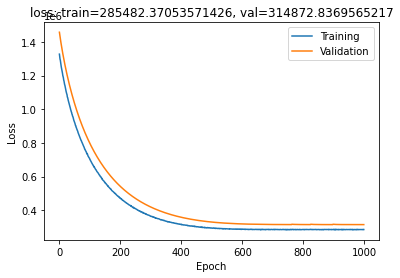

In [13]:
import time
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import torch
from torch import nn
import torch.optim as optim

class Trainer:
    def __init__(self, csv_path, num_epochs, batch_size, lr, save_weights_path):
        self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        print("self.device = ", self.device)

        datalist = makeDataList(csv_path)
        past_size = 16
        future_size = 16
        train_datalist, val_datalist = train_test_split(datalist, test_size=0.1, random_state=1234, shuffle=True)
        train_dataset = DatasetMaker(train_datalist, past_size, future_size)
        val_dataset = DatasetMaker(val_datalist, past_size, future_size)
        train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
        val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False, drop_last=False)
        
        self.num_epochs = num_epochs
        self.dataloaders_dict = {"train": train_dataloader, "val": val_dataloader}
        self.net = Network(
            input_dim = train_dataset.__getitem__(index=0)[0].shape[1],
            hidden_dim = 128,
            output_dim = train_dataset.__getitem__(index=0)[1].shape[0] * train_dataset.__getitem__(index=0)[1].shape[1],
            num_layers = 2
        )
        self.net.to(self.device)
        print(self.net)
        self.criterion = nn.MSELoss()
        self.optimizer = optim.Adam(self.net.parameters(), lr=lr)

    def train(self):
        ## time
        start_clock = time.time()
        ## record
        record_train_loss = []
        record_val_loss = []
        record_loss_dict = {"train": [], "val": []}
        min_loss_epoch = 0.0
        ## loop
        for epoch in range(self.num_epochs):
            if epoch == 0 or not (epoch+1) % (num_epochs // 10):
                print("----------")
                print("Epoch {}/{}".format(epoch+1, self.num_epochs))
            ## phase
            for phase in ["train", "val"]:
                ## setting
                if phase == "train":
                    self.net.train()
                else:
                    self.net.eval()
                ## buffer
                loss_epoch = 0.0
                num_inputs_epoch = 0
                for inputs, labels in self.dataloaders_dict[phase]:
                    inputs = inputs.to(self.device)
                    labels = labels.to(self.device)
                    ## reset gradient
                    self.optimizer.zero_grad()
                    ## switch computing gradient
                    with torch.set_grad_enabled(phase == "train"):
                        ## forward
                        outputs = self.net(inputs)
                        loss = self.criterion(outputs, labels)
                        ## backward
                        if phase == "train":
                            loss.backward()
                            self.optimizer.step()
                    ## add
                    loss_epoch += loss.item() * inputs.size(0)
                    num_inputs_epoch += inputs.size(0)
                ## average loss
                loss_epoch = loss_epoch / num_inputs_epoch
                record_loss_dict[phase].append(loss_epoch)
                if epoch == 0 or not (epoch+1) % (num_epochs // 10):
                    print("{} Loss: {:.4f}".format(phase, loss_epoch))
            ## save
            if epoch == 0 or record_loss_dict["val"][-1] < min_loss_epoch:
                min_loss_epoch = record_loss_dict["val"][-1]
                torch.save(self.net.state_dict(), save_weights_path)
        ## time
        mins = (time.time() - start_clock) // 60
        secs = (time.time() - start_clock) % 60
        print ("training time: ", mins, " [min] ", secs, " [sec]")
        ## graph
        self.showGraph(record_loss_dict)

    def showGraph(self, record_loss_dict):
        graph = plt.figure()
        plt.plot(range(len(record_loss_dict["train"])), record_loss_dict["train"], label="Training")
        plt.plot(range(len(record_loss_dict["val"])), record_loss_dict["val"], label="Validation")
        plt.legend()
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title("loss: train=" + str(record_loss_dict["train"][-1]) + ", val=" + str(record_loss_dict["val"][-1]))
        plt.show()


csv_path = "/content/train.csv"
num_epochs = 1000
batch_size = 100
lr = 0.01
save_weights_path = "/content/weights.pth"

trainer = Trainer(csv_path, num_epochs, batch_size, lr, save_weights_path)
trainer.train()

# Evaluation

In [19]:
import time
import pandas as pd

import torch

class Evaluator:
    def __init__(self, past_csv_path, test_csv_path, weights_path, save_csv_path):
        self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        print("self.device = ", self.device)

        past_size = 16
        future_size = 16

        self.test_csv_path = test_csv_path
        self.save_csv_path = save_csv_path
        self.past_datalist = makeDataList(past_csv_path).values.astype(np.float32)[-past_size:]

        self.net = Network(
            input_dim = self.past_datalist.shape[1],
            hidden_dim = 128,
            output_dim = future_size * self.past_datalist.shape[1],
            num_layers = 2
        )
        self.net.to(self.device)
        if torch.cuda.is_available():
            loaded_weights = torch.load(weights_path)
            print("Weights have been loaded [GPU -> GPU]:", weights_path)
        else:
            loaded_weights = torch.load(weights_path, map_location={"cuda:0": "cpu"})
            print("Weights have been loaded [GPU -> CPU]:", weights_path)
        self.net.load_state_dict(loaded_weights)
        print(self.net)

    def evaluate(self):
        ## time
        start_clock = time.time()
        ## setting
        self.net.eval()
        ## ndarray -> tensor
        inputs = torch.from_numpy(self.past_datalist)
        inputs.unsqueeze_(0)
        inputs = inputs.to(self.device)
        ## forward
        with torch.no_grad():
            outputs = self.net(inputs)
        ## save
        self.writeCSV(outputs)
        ## time
        mins = (time.time() - start_clock) // 60
        secs = (time.time() - start_clock) % 60
        print ("evaluation time: ", mins, " [min] ", secs, " [sec]")

    def writeCSV(self, outputs):
        test_df = pd.read_csv(self.test_csv_path)
        result_df = pd.DataFrame({"id": test_df["id"].values, "sales": outputs.cpu().detach().numpy().reshape(-1)})
        result_df.to_csv(self.save_csv_path, index=False)
        print(result_df)


past_csv_path = "/content/train.csv"
test_csv_path = "/content/test.csv"
weights_path = "/content/weights.pth"
save_csv_path = "/content/submission.csv"

evaluator = Evaluator(past_csv_path, test_csv_path, weights_path, save_csv_path)
evaluator.evaluate()

self.device =  cpu
Weights have been loaded [GPU -> CPU]: /content/weights.pth
Network(
  (rnn): RNN(1782, 128, num_layers=2, batch_first=True)
  (fc): Linear(in_features=128, out_features=28512, bias=True)
)
            id        sales
0      3000888     2.295656
1      3000889     0.004671
2      3000890     2.695600
3      3000891  1591.645142
4      3000892     0.186374
...        ...          ...
28507  3029395    52.332005
28508  3029396    60.930798
28509  3029397   352.430359
28510  3029398     0.689772
28511  3029399     1.942953

[28512 rows x 2 columns]
evaluation time:  0.0  [min]  0.09764671325683594  [sec]


# Submission

In [21]:
import sys

print("Submit the file? (y/n)")
ans = input()
while ans != "y" and ans != "n":
    print("Type 'y' or 'n'")
    ans = input()
if ans == "y":
    !kaggle competitions submit -c store-sales-time-series-forecasting -f submission.csv -m "store_sales_rnn.ipynb"

Submit the file? (y/n)
y
100% 500k/500k [00:00<00:00, 1.90MB/s]
Successfully submitted to Store Sales - Time Series Forecasting